# Setup

In [5]:
%install_ext https://raw.githubusercontent.com/mkrphys/ipython-tikzmagic/master/tikzmagic.py

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


In [1]:
%load_ext tikzmagic

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Background

Recall that the simplistic measurement equation can be defined as follows:
\begin{equation}
V_{measured}(u,v,w) \approx \left<\int_{sources}I(l,m,n)e^{\frac{2\pi i}{\lambda}(ul+vm+w(n-1))}\frac{dldm}{n}\right> \text{ where } n\approx\sqrt{1-l^2-m^2}
\end{equation}
In order to use a 2 dimensional discrete fourier transform $n-1\approx 0$ (the tangent planar approximation better be close to the celestial sphere). This assumption is invalid in widefield imaging and it is necessary to correct for the resulting phase delay.

Let us define the phase error introduced by imaging over wider fields of view with non-coplanar baselines (non-zero w terms) as
\begin{equation}
\xi:=\frac{2{\pi}||\Delta{w}||\epsilon}{{\lambda_{min}}{n_{\text{planes}}}} \text{ and ideally } 0{\leq\xi\ll}1
\end{equation}

Here $\epsilon$ represents the distance between the celestial sphere and the [tangential] planar projection. For simplicity we assume an orthogonal (SIN projection in FITS nomenclature) coordinate projection is used. In other words for each $(l,m,n)$ coordinate $n = 1$ where n is defined to be in the direction of the phase centre, with orthogonal $l$ and $m$ direction cosines. $l$ and $m$ are the direction cosines with respect to $u$ and $v$ respectively.

In order to decrease $\xi$ we need $n_{\text{planes}}{\rightarrow}\infty$. $n_{planes}$ represent the number of w-projection planes needed to drive down the phase error, $\xi$.

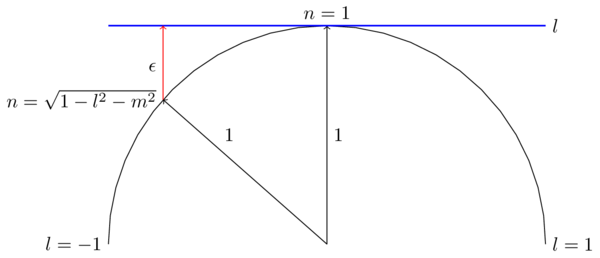

In [3]:
%%tikz --scale 2 --size 600,600 -f png
\draw [black, domain=0:180] plot ({2*cos(\x)}, {2*sin(\x)});
\draw [black, ->] (0,0) -- (0,2);
\draw [black, ->] (0,0) -- ({-0.75*2},{sqrt(4-(-0.75*2)*(-0.75*2))});
\node [above] at (0,1*2) {$n=1$};
\node [right] at (0,0.5*2) {$1$};
\node [right] at (-0.5*2,0.5*2) {$1$};
\node [left] at ({-0.75*2},{sqrt(4-(-0.75*2)*(-0.75*2))}) {$n=\sqrt{1-l^2-m^2}$};
\draw [blue,thick] (-2,2) -- (2,2);
\draw [red, ->] ({-0.75*2},{sqrt(4-(-0.75*2)*(-0.75*2))}) -- ({-0.75*2},2);
\node [left] at ({-0.75*2},{sqrt(4-(-0.75*2)*(-0.75*2))+0.15*2}) {$\epsilon$};
\node [right] at ({1*2},{1*2}) {$l$};
\node [right] at ({1*2},{0*2}) {$l=1$};
\node [left] at ({-1*2},{0*2}) {$l=-1$};

The effect of a large range of w values is apparent from the equation for phase error above. For very long baselines, especially those originating from non-coplanar arrays (e.g VLBI) over extended periods of time this w term has a multiplicative effect on the error:
\begin{equation}
 \xi\propto||\Delta{w}||\epsilon
\end{equation}
It must be emphasized that over an extended period of time the baselines of any general non-East-West array will be rotated up into the w-direction

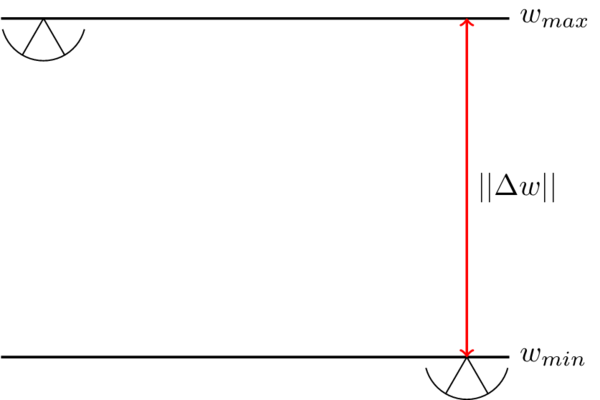

In [4]:
%%tikz --scale 2 --size 600,600 -f png
\draw [black,thick] (0,2) -- (3,2);
\draw [black,thick] (0,0) -- (3,0);
\draw [black, domain={180+15}:{360-15}] plot ({(cos(\x)+1)*0.25}, {(sin(\x))*0.25+2});
\draw [black] ({0.25*0.5},{2 - sqrt(0.25*0.25*(1-0.5*0.5))}) -- ({0.25},{2});
\draw [black] ({0.25*1.5},{2 - sqrt(0.25*0.25*(1-0.5*0.5))}) -- ({0.25},{2});
\draw [black, domain={180+15}:{360-15}] plot ({(cos(\x)-1)*0.25+3}, {(sin(\x))*0.25});
\draw [black] ({3-0.25*0.5},{0 - sqrt(0.25*0.25*(1-0.5*0.5))}) -- ({3-0.25},{0});
\draw [black] ({3-0.25*1.5},{0 - sqrt(0.25*0.25*(1-0.5*0.5))}) -- ({3-0.25},{0});
\draw [red,thick,<->] ({3-0.25},{0}) -- ({3-0.25},{2});
\node [right] at ({3-0.25},{1}) {$||\Delta{w}||$};
\node [right] at ({3},{2}) {$w_{max}$};
\node [right] at ({3},{0}) {$w_{min}$};

# Epsilon for w-projected images

The maximum error occurs at one of the corners of the facet/image, ie. lets say at: 
\begin{equation}
    \begin{split}
            d &= (\theta_l/2,\theta_m/2)\\
    \end{split}
\end{equation}
Where $\theta_l=n_xcell_x \text{ rads and } \theta_m=n_ycell_y \text{ rads}$

The following identities relate the directions (assumed to be given in right assension and declination $\theta_l/2$ and $\theta_m/2$ to points on the celestial sphere.
\begin{equation}
    \begin{split}
        l &= \cos{\delta}\sin{\Delta\alpha}\\
        m &= \sin{\delta}\cos{\delta_0} - \cos{\delta}\sin{\delta_0}\cos{\Delta\alpha}\\
        n &= \sin{\delta}\sin{\delta_0} + \cos{\delta}\cos{\delta_0}\cos{\Delta\alpha}\\
    \end{split}
\end{equation}

The difference between a point on the orthogonally projected image and the corresponding point on the celestial sphere is given by:
\begin{equation}
    \epsilon = ||n - 1|| = ||\sqrt{1-(\Delta{(l/2)})^2-(\Delta{(m/2)})^2} - 1||
\end{equation}
where $\Delta{(l/2)}$ and $\Delta{(m/2)}$ correspond to the direction cosines of the point at $(\alpha + \theta_l/2,\delta + \theta_m/2)$ where $\alpha$ and $\delta$ correspond to the phase centre at the centre of the facet/image.

The corresponding relation between number of planes and epsilon is given as:
\begin{equation}
n_{\text{planes}}=\frac{2{\pi}||\Delta{w}||\epsilon}{{\lambda_{min}}{\xi}} \text{ and ideally } 0{\leq\xi\ll}1
\end{equation}

# Epsilon for faceted images

Here the half facet size (in l and m) is given as $\theta_{l_f}/2 = \theta_l/(2n_{facets})$ and $\theta_{m_f}/2 = \theta_m/(2n_{facets})$ respectively. We know the arc subtended by the angle to the corner of the facet has length $\cos{(\theta_{l_f}/2)}\cos{(\theta_{m_f}/2)}$ using the spherical rule of cosines and assuming a unit celestial sphere and orthogonal u and v bases. This angle to the corner of the image is a small number, so we might as well just use the small angle approximation: 
\begin{equation}
    \epsilon \approx \sin{(\delta_0 + \theta_l/2)}\sin{\delta_0} + \cos{(\delta_0 + \theta_l/2)}\cos{\delta_0}\cos{(\theta_m/2)} - \cos{\left[max(\theta_{l},\theta_{m})/(2n_{facets})\right]}
\end{equation}
This results in the following relation between half the number of linearly spaced facets (along a single diagonal of the facet image) and $\xi$:
\begin{equation}
n_{facets} = \frac{max(\theta_l,\theta_m)}{2\cos^{-1}{\left[\sin{(\delta_0 + \theta_l/2)}\sin{\delta_0} + \cos{(\delta_0 + \theta_l/2)}\cos{\delta_0}\cos{(\theta_m/2)}-\frac{\lambda_{min}\xi}{2{\pi}||\Delta{w}||}\right]}}
\end{equation}

In [5]:
def compute_lmn(phase_centres,image_coordinate):
    delta_ra = - phase_centres[0] + image_coordinate[0]
    dec0 = phase_centres[1]
    dec = image_coordinate[1]
    return (np.cos(dec)*np.sin(delta_ra),
            np.sin(dec)*np.cos(dec0)-np.cos(dec)*np.sin(dec0)*np.cos(delta_ra),
            np.sin(dec)*np.sin(dec0)+np.cos(dec)*np.cos(dec0)*np.cos(delta_ra))

In [6]:
def construct_rot_matrix(ra,dec):
    rot_matrix = [[np.sin(ra),np.cos(ra),0],
                  [-np.sin(dec)*np.cos(ra),np.sin(dec)*np.sin(ra),np.cos(dec)],
                  [np.cos(dec)*np.cos(ra),-np.cos(dec)*np.sin(ra),np.sin(dec)]]
    return np.matrix(rot_matrix)
def compute_new_uvw(old,new,uvw):
    rot_matrix = construct_rot_matrix(old[0],old[1])
    rot_matrix_new = construct_rot_matrix(new[0],new[1])
    return rot_matrix_new * rot_matrix.T * np.matrix(uvw).T #transpose of a Euler rotation matrix is the inverse rotation

# Calculator

In [9]:
nx = ny = 1024
cellx = celly = 8 / 60.0 / 60.0 * np.pi / 180.0 #8*1024 arcsec in radians
ra = (290 + 25 / 60 + 0 / 60 / 60) * np.pi / 180
dec = (21 + 45 / 60 + 0 / 60 / 60) * np.pi / 180
phase_centre = np.array([ra,dec]) #should be read from MS
max_err = phase_centre + np.array([cellx*nx/2.0,celly*ny/2.0])
lmn_max_err = compute_lmn(phase_centre,max_err)
delta_w = 1031.2111327 #should be read from MS
min_lambda = 0.15762 #should be read from MS
e = np.abs(lmn_max_err[2]-1)
threshold = 0.5
num_planes_needed = np.ceil(2 * np.pi * delta_w * e / (min_lambda * threshold))
(li,mi,ni) = compute_lmn(phase_centre,phase_centre + np.array([cellx*nx/2.0,celly*ny/2.0]))
num_facets_needed = np.ceil(np.sqrt((cellx*nx) / (2*np.arccos(ni - (min_lambda *threshold)/(2*np.pi*delta_w))))*2)
print num_planes_needed, "planes needed to obtain seperation"
print num_facets_needed, "facets needed along each dimension of the final image to obtain speration"


31.0 planes needed to obtain seperation
2.0 facets needed along each dimension of the final image to obtain speration
